# Background considering the photopeak
gross area = $10064$ \
net area = $7241 \pm 328$ 

In [202]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15, 10)


net_background = 7241 
net_error = 328
background_error = 891 #  50.72
gross_background = 90587 * (58.68/164.60)
mu_cu = 0.640 # cm^-1
mu_pb = 1.170 # cm^-1
dx = 0.25 # cm


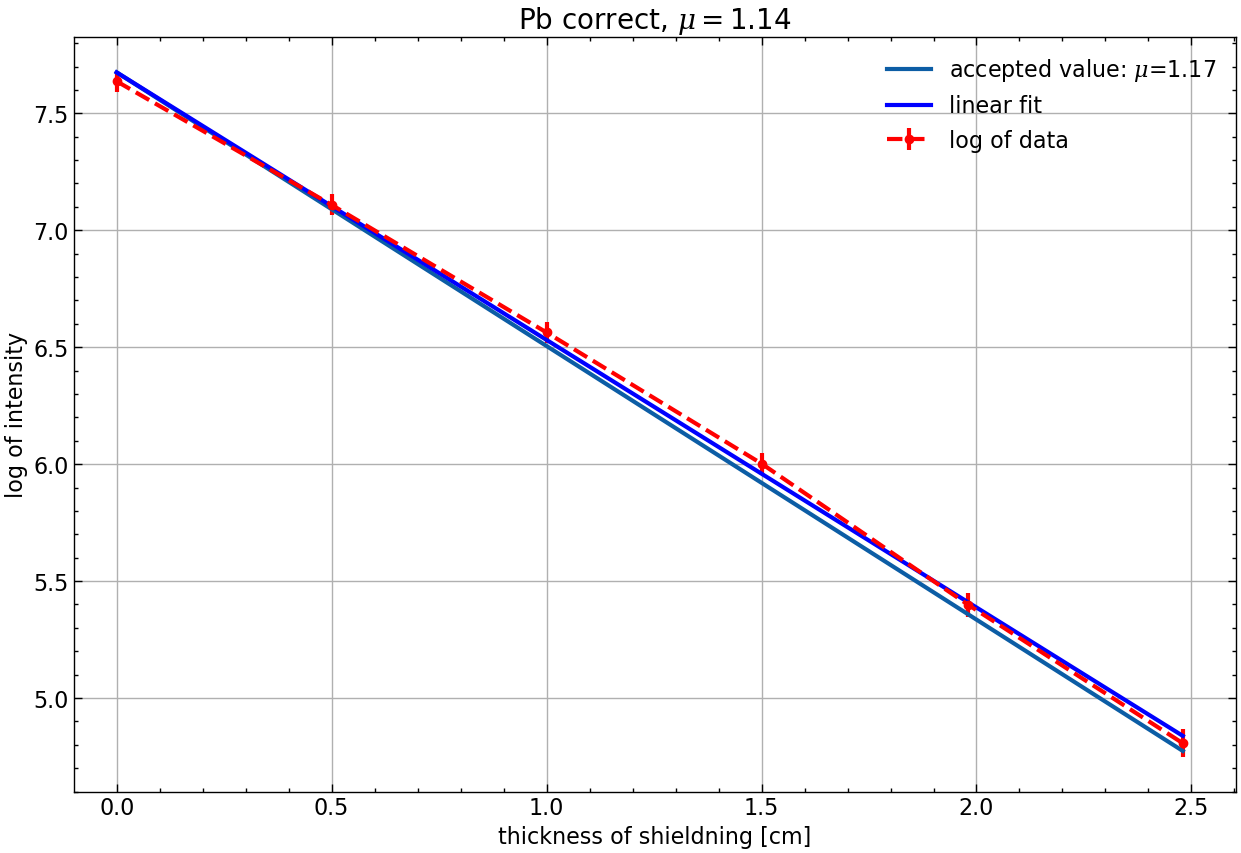

In [218]:
name = "Pb correct" # "Pb correct" "Cu incorrect" "Cu correct"
data = pd.read_csv("../NuclearPhysicsLab/" + name + ".txt")

# wierd data points in the end
if name == "Cu correct":
    data = data[:-2]

x_k, A_k, error_k, t_k = data.keys()
x = data[x_k].to_numpy().cumsum() / 10 # in cm

if "incorrect" in name:
    A = data[A_k].to_numpy() - gross_background
else: 
    A = data[A_k].to_numpy() - net_background
    
error = data[error_k].to_numpy()
t = data[t_k].to_numpy() # live time
I = A/t
I_background = I[0] # background intensity 
logI = np.log(I)
I_true = I - I_background # true intensity
dI_true = 
I0 = I_true[0] # true initial intensity

slope, intercept, r, p, std_err = stats.linregress(x, logI)

# dividing by I since the errors are shown in a log plot
s_lnI = std_err * np.sqrt(len(t)) #np.sqrt(A) / t
s_area = error / t / I 
s_total = np.sqrt(s_I**2 + s_area**2) # total error


plt.title(name + f", $\mu = ${-slope.round(2)}", fontsize=20)
# plt.plot(x, logI, "-ro", label="log of data")
plt.errorbar(x, logI, fmt="--ro", yerr=s_total, label="log of data")
if "Cu" in name:
    plt.plot(x, -mu_cu*x+intercept, label=f"accepted value $\mu$={mu_cu}")
else:
    plt.plot(x, -mu_pb*x+intercept, label=f"accepted value: $\mu$={mu_pb}")
plt.plot(x, slope*x + intercept, "b", label="linear fit")
# plt.plot(x, A, "r-o") # plot for the true copper with wierd values
plt.xlabel("thickness of shieldning [cm]"), plt.ylabel("log of intensity")
plt.xlim(-0.1)
plt.legend()
plt.grid()

# if name == "Cu correct":
#     plt.savefig(name + " modified" + ".png") 
# else:
#     plt.savefig(name + ".png")

# Error analysis

In [219]:
s_total

array([0.04451914, 0.04478775, 0.04553333, 0.04702347, 0.05110195,
       0.05981057])

In [220]:
s_lnI

0.04370531656722309

In [179]:
error / t / I

array([0.00847345, 0.00978714, 0.0127722 , 0.01735084, 0.02648122,
       0.04083074])

In [189]:
s_background

array([0.00847345, 0.01437194, 0.02480062, 0.0434516 , 0.0794009 ,
       0.14365357])

In [175]:
s_background

17.567034700315457

In [66]:
import csv

# Open the CSV file and read the contents
with open("../NuclearPhysicsLab/" + name + ".txt", 'r') as f:
    reader = csv.reader(f)
    rows = list(reader)

# Convert the rows to a LaTeX table
table = '\\begin{tabular}{' + ('c' * len(rows[0])) + '}\n'
for row in rows:
    table += ' & '.join(row) + ' \\' + " \n "


In [67]:
table

'\\begin{tabular}{cccc}\nthickness (mm) & Net area & error & live time \\ \n 0 &  112393 &  891 &  50.72 \\ \n 5.0 &  73246 &  646 &  54.00 \\ \n 5.0 &  46780 &  505 &  55.82 \\ \n 5.0 &  30237 &  399 &  56.88 \\ \n 4.8 &  19967 &  337 &  57.52 \\ \n 5.0 &  14319 &  289 &  57.88 \\ \n '